-Data set ambil lgsg dr twitter

-Keyword nya ditag mana yg negatif, netral, positif

-Kl pake linear, netralnya ada dmn krn ada 3 value

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')

INITIALIZATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import joblib

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
'''from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !pwd

/content/gdrive


In [ ]:
'''%cd gdrive
# try:
#     %cd /content/gdrive/aiSentimentAnalysisProduct
#     print("success")
# except:
!mkdir aiSentimentAnalysisProduct
%cd /content/gdrive/aiSentimentAnalysisProduct

In [2]:
# load dataset
df = pd.read_csv("Twitter_Data.csv")

In [5]:
'''from matplotlib import pyplot as plt
_df_0[' sentiment'].plot(kind='hist', bins=20, title=' sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)'''

"from matplotlib import pyplot as plt\n_df_0[' sentiment'].plot(kind='hist', bins=20, title=' sentiment')\nplt.gca().spines[['top', 'right',]].set_visible(False)"

In [7]:
# file_name = 'Twitter_Data.xlsx'
# df = pd.read_excel(file_name)
# df.head

EXPERIMENTING ON NORMALIZATION & REMOVING STOP WORDS

In [8]:
import re
stop_words = ['is', 'that', 'and', 'this', 'its', 'http', 'com', 'twitpic', 'or',
              'https', 'hashtag', 'instagram', 'fna', 'fbcdn', 'net', 'jpg',
              'src', 'the', 'not', 'from', 'than', 'for',
              'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there',
              'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they',
              'own', 'an', 'be', 'some', 'for', 'do',
              'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other',
              'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the',
              'themselves', 'until', 'below', 'are',
              'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were',
              'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their',
              'while', 'above', 'both', 'up', 'to',
              'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before',
              'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does',
              'yourselves', 'then', 'that', 'because',
              'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under',
              'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself',
              'which', 'those', 'i', 'after', 'few',
              'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by',
              'doing', 'it', 'how', 'further', 'was', 'here', 'than', 'level', 'mfanolyte']
def remove_words(text, words_to_remove):
    pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'
    return re.sub(pattern, '', text)

df = df.dropna()  # Removes rows with NaN values
df.iloc[:, 0] = df.astype(str)  # Convert all values to strings, including NaN
# df.iloc[:, 1] = df.fillna(0)  # Replace NaN values with 0
# df.iloc[:, 1] = df.astype(int)  # Convert all values to strings, including NaN
df.iloc[:, 0] = df.iloc[:, 0].str.lower()
# df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: ' '.join(re.findall(r'\b[a-z]{3,15}\b', x))) ##menghilangkan simbol
# df['text'] = df['text'].apply(lambda x: remove_words(x, stop_words))
# print(df['text'])
df.head

<bound method NDFrame.head of                                               clean_text  category
0      when modi promised “minimum government maximum...      -1.0
1      talk all the nonsense and continue all the dra...       0.0
2      what did just say vote for modi  welcome bjp t...       1.0
3      asking his supporters prefix chowkidar their n...       1.0
4      answer who among these the most powerful world...       1.0
...                                                  ...       ...
15178  why these 456 crores paid neerav modi not reco...      -1.0
15179  dear rss terrorist payal gawar what about modi...      -1.0
15180  did you cover her interaction forum where she ...       0.0
15181  there big project came into india modi dream p...       0.0
15182  have you ever listen about like gurukul where ...       1.0

[15178 rows x 2 columns]>

In [9]:
x_train_raw, x_test_raw, y_train, y_test = train_test_split(
                df.iloc[:, 0], df.iloc[:, 1],
                test_size = 0.2, random_state=42)

In [10]:
print(x_train_raw)

11527    this must the biggest joke this which not capa...
10872    but you guys told that afyer modi they have be...
2056     modis challengers tell how bad not how good th...
11588    land air space had courage surgical strikes mo...
2059                           modi will back double power
                               ...                        
5192     the three lakh crore will come back into the s...
13423    salve british gandhi gave freedom and was shot...
5391               literally anyone but not the clown modi
861      modi has finished all corruption the cabinet l...
7271     \nthen job seekers now job creators due modi g...
Name: clean_text, Length: 12142, dtype: object


NLP PROCESS

In [11]:
# vect = CountVectorizer()
# vect.fit(x_train)

vect = TfidfVectorizer()
vect.fit_transform(x_train_raw)

<12142x22254 sparse matrix of type '<class 'numpy.float64'>'
	with 226177 stored elements in Compressed Sparse Row format>

In [12]:
vect_path = '/content/vectorizer_1.pkl'
joblib.dump(vect, vect_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/vectorizer_1.pkl'

In [13]:
x_train = vect.transform(x_train_raw)
x_test = vect.transform(x_test_raw)

In [14]:
print(x_train)

  (0, 261)	0.2052112186661987
  (0, 2956)	0.262907230225526
  (0, 3712)	0.3112341012194838
  (0, 5728)	0.37590851433223
  (0, 10957)	0.30438349157667105
  (0, 11053)	0.1782491613265132
  (0, 13651)	0.22759586593203407
  (0, 14168)	0.12475084377417632
  (0, 14668)	0.23684092234723847
  (0, 15970)	0.22582683654375682
  (0, 15975)	0.2278220292462659
  (0, 16853)	0.2619196119073876
  (0, 19976)	0.08659560229795905
  (0, 19991)	0.18188692098726322
  (0, 20069)	0.2527721143888801
  (0, 21541)	0.16092897460160538
  (0, 21676)	0.15862429189069113
  (0, 21696)	0.20055616526259998
  (0, 21707)	0.18829612659622108
  (1, 968)	0.27052067385066414
  (1, 1201)	0.4457550953907332
  (1, 1591)	0.09908049503951419
  (1, 2470)	0.24237894957264383
  (1, 2641)	0.2034876613455052
  (1, 3589)	0.14782846110459116
  :	:
  (12140, 3621)	0.3550592868546742
  (12140, 5029)	0.2803132928558551
  (12140, 7801)	0.42000230473939687
  (12140, 8029)	0.3725019500161251
  (12140, 9141)	0.16371744078338132
  (12140, 11890)	

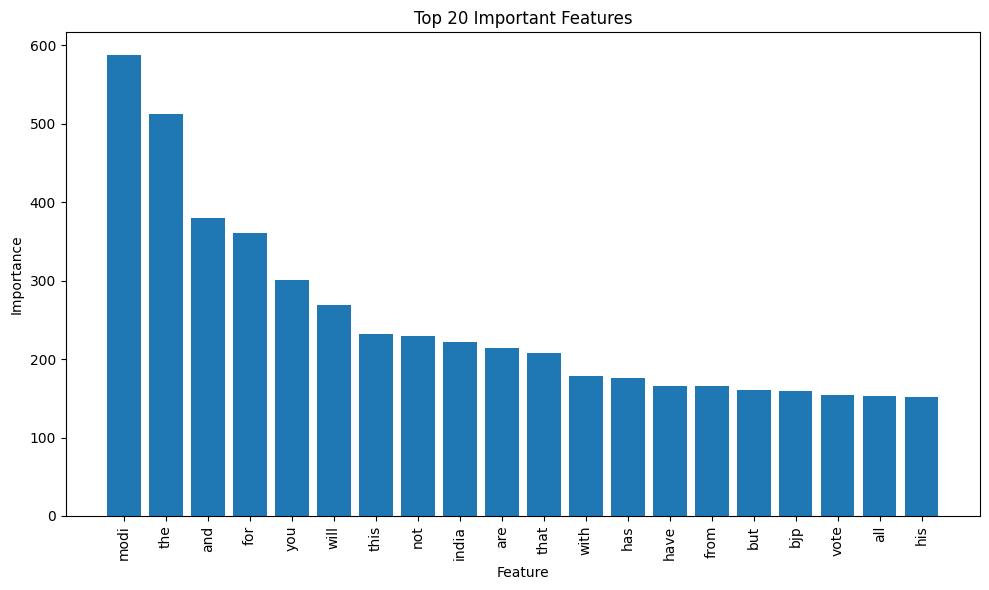

In [15]:
feature_importance = x_train.sum(axis=0).A1
feature_names = vect.get_feature_names_out()

# Create a DataFrame to organize the feature names and their respective importance values
data = {'Feature': feature_names, 'Importance': feature_importance}
df = pd.DataFrame(data)

# Sort DataFrame by importance values
df_sorted = df.sort_values(by='Importance', ascending=False).head(20) # Top 20 features

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Feature'], df_sorted['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Important Features')
plt.xticks(rotation=90)  # Rotate x-labels for better visibility
plt.tight_layout()
plt.show()

In [16]:
# from sklearn.preprocessing import MaxAbsScaler

# # Min-Max scaling
# scaler = MaxAbsScaler()
# X_scaled = scaler.fit_transform(x_train)
# print(X_scaled.toarray())

In [17]:
from sklearn.model_selection import GridSearchCV

# Create a dictionary of possible parameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ['linear']}

# Create the GridSearchCV object
grid_clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# Fit the data with the best possible parameters
grid_clf.fit(x_train, y_train)

# Print the best estimator with its parameters
print(grid_clf.best_estimator_)


In [ ]:
classifier = SVC(kernel = 'linear')
# classifier = SVC(C=10, class_weight='balanced', gamma=0.0001, kernel='linear')

In [ ]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = classifier.predict(x_test)


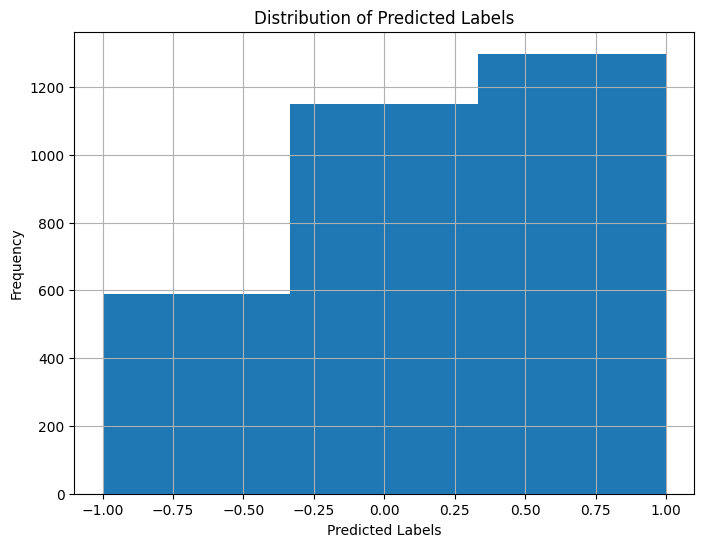

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=len(set(y_test)))
plt.xlabel('Predicted Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Labels')
plt.grid(True)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 494  101  119]
 [  28  937   69]
 [  67  111 1110]]
0.8369565217391305
              precision    recall  f1-score   support

        -1.0       0.84      0.69      0.76       714
         0.0       0.82      0.91      0.86      1034
         1.0       0.86      0.86      0.86      1288

    accuracy                           0.84      3036
   macro avg       0.84      0.82      0.83      3036
weighted avg       0.84      0.84      0.83      3036



In [ ]:
def filter_string(input_string):
    # Apply the regex pattern and filter logic
    filtered_words = re.findall(r'\b[a-z]{3,15}\b', input_string.lower())
    # Join the filtered words into a single string
    filtered_string = ' '.join(filtered_words)
    return filtered_string

In [ ]:
# text_test = "Loving the behind the scenes. Keep them coming! I watched an episode of Slow Horses last night and could swear a bit of it was filmed where Fix You was filmed. Would love to know more background"
# text_test = "modi government changed the lifestyle common man sat sharma via speaks"
# text_test = "Unpopular opinion: commenting free Palestine and to boycott Mc Donald’s doesn’t and WILL NOT stop people dying in Palestine"
# text_test = "I swear I will never buy McD again #freepalestine tastes like shit"

text_test = "Shell oil is all over the world"
text_test = text_test.lower()
# text_test = filter_string(text_test)
text=np.array([text_test], dtype=object)
sample = vect.transform(text)
pred = classifier.predict(sample)
print(text_test, "\nSentiment: ", pred[0])

text_test = "I swear I will never buy McD again #freepalestine tastes like shit"
text_test = text_test.lower()
text=np.array([text_test], dtype=object)
sample = vect.transform(text)
pred = classifier.predict(sample)
print(text_test, "\nSentiment: ", pred[0])

text_test = "Loving the behind the scenes. Keep them coming! I watched an episode of Slow Horses last night and could swear a bit of it was filmed where Fix You was filmed. Would love to know more background"
text_test = text_test.lower()
text=np.array([text_test], dtype=object)
sample = vect.transform(text)
pred = classifier.predict(sample)
print(text_test, "\nSentiment: ", pred[0])

shell oil is all over the world 
Sentiment:  0.0
i swear i will never buy mcd again #freepalestine tastes like shit 
Sentiment:  -1.0
loving the behind the scenes. keep them coming! i watched an episode of slow horses last night and could swear a bit of it was filmed where fix you was filmed. would love to know more background 
Sentiment:  1.0


ValueError: ignored

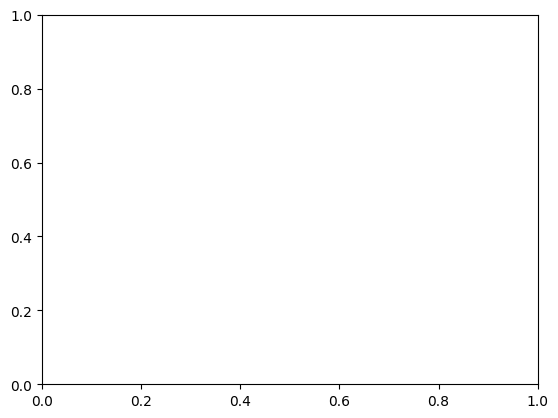

In [ ]:
# Plot the SVM decision boundary
# Note: This is a simple 2D representation, and actual feature space may have more dimensions
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary
ax.contour(xx, yy, Z.reshape(xx.shape), colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

CRAWLING DATA FROM IG

In [ ]:
!pip install stdiomask
!apt install chromium-chromedriver
!pip install selenium
!sudo apt-get install python-yaml
!sudo yum install python-yaml
!apt-get update
!apt install python3-dev python3-pip
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

TEXTBLOB

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob# Get sentiment analysis
text = ["shell oil is all over the world", "loving the behind the scenes. keep them coming! i watched an episode of slow horses last night and could swear a bit of it was filmed where fix you was filmed. would love to know more background", "i swear i will never buy mcd again #freepalestine tastes like shit "]
for i in range(3):
    print(text[i])
    blob = TextBlob(text[i])
    print(blob.sentiment)

shell oil is all over the world
Sentiment(polarity=0.0, subjectivity=0.0)
loving the behind the scenes. keep them coming! i watched an episode of slow horses last night and could swear a bit of it was filmed where fix you was filmed. would love to know more background
Sentiment(polarity=0.13333333333333333, subjectivity=0.5361111111111111)
i swear i will never buy mcd again #freepalestine tastes like shit 
Sentiment(polarity=-0.2, subjectivity=0.8)


TWITTER CRAWLING

In [ ]:
pip install git+https://github.com/tweepy/tweepy.git

  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-2m71hamp
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-2m71hamp
  Resolved https://github.com/tweepy/tweepy.git to commit f32d12dbddbd877470446657812a10a04292d0c9
  Preparing metadata (setup.py) ... done


In [ ]:
import requests

# Replace 'YOUR_ACCESS_TOKEN' with your actual access token
access_token = 'YOUR_ACCESS_TOKEN'

# Replace 'POST_ID' with the ID of the post you want to retrieve comments from
post_id = 'POST_ID'

# Make a request to the Instagram Graph API to retrieve comments
url = f'https://graph.instagram.com/v12.0/{post_id}/comments?access_token={access_token}'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract and print the comments
    comments = response.json()['data']
    for comment in comments:
        print(comment['text'])
else:
    print(f"Error: {response.status_code}")
    print(response.json())


In [ ]:
import tweepy
import pandas as pd

# Set up your Twitter API Bearer Token
consumer_key = "" #Your API/Consumer key
consumer_secret = "" #Your API/Consumer Secret Key
bearer_token = ""

# Set up your Twitter API Bearer Token
bearer_token = "AAAAAAAAAAAAAAAAAAAAAM8irgEAAAAA659dSUprXxYmK%2FgJSkp%2FgnOz%2Bt8%3D69FEfxFRmoptcpOEolISKFI7DoxDJGuPVN3SkCZ6UsKojpHL2P"

try:
    # Authenticate with the Twitter API using Bearer Token
    auth = tweepy.OAuth2BearerHandler(bearer_token)
    api = tweepy.API(auth, wait_on_rate_limit=True)

    # Verify authentication
    if not api.verify_credentials():
        raise tweepy.TweepError("Failed to authenticate with Twitter API")

    # Search for tweets containing a specific keyword (e.g., 'Python')
    keyword = 'Python'
    num_tweets = 100  # Adjust the number of tweets you want to fetch

    tweets = tweepy.Cursor(api.search_tweets, q=keyword, lang='en').items(num_tweets)

    # Extract relevant information from tweets
    tweet_data = []
    for tweet in tweets:
        tweet_data.append({
            'text': tweet.text,
            'created_at': tweet.created_at,
            'user': tweet.user.screen_name,
            'user_location': tweet.user.location
        })

    # Create a DataFrame from the collected data
    df = pd.DataFrame(tweet_data)

    # Save the DataFrame to a CSV file
    df.to_csv('tweets.csv', index=False)

    # Display the DataFrame
    print(df.head())

except tweepy.errors.TweepyException as e:
    print(f"Error: {str(e)}")


Error: 401 Unauthorized
89 - Invalid or expired token.


In [ ]:
import tweepy
import pandas as pd

consumer_key = "vN1LIJjJuLrgWpFoUq3Wcl7Vj" #Your API/Consumer key
consumer_secret = "3oAhivnBtcXjgq1dnkWdlnxPHMEavlm0RBCDta4reWgnyjMA77" #Your API/Consumer Secret Key
access_token = "1736759677541822464-v2RvnrWSMVLYOLabZHmiukRHEnoTpe"    #Your Access token key
access_token_secret = "16DCK5xPhQv2HR5BihSup18TZlpgoTNGAMxJFdGbVZZ5G" #Your Access token Secret key
bearer_token = "AAAAAAAAAAAAAAAAAAAAAM8irgEAAAAA659dSUprXxYmK%2FgJSkp%2FgnOz%2Bt8%3D69FEfxFRmoptcpOEolISKFI7DoxDJGuPVN3SkCZ6UsKojpHL2P"

# Authenticate with the Twitter API using Bearer Token
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret, bearer_token)
api = tweepy.API(auth, wait_on_rate_limit=True)

#Pass in our twitter API authentication key
# auth = tweepy.OAuth1UserHandler(
#     consumer_key, consumer_secret,
#     access_token, access_token_secret
# )

#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)


search_query = "'ref''world cup'-filter:retweets AND -filter:replies AND -filter:links"
no_of_tweets = 100

try:
    #The number of tweets we want to retrieved from the search
    tweets = api.search_tweets(q=search_query, lang="en", count=no_of_tweets, tweet_mode ='extended')

    #Pulling Some attributes from the tweet
    attributes_container = [[tweet.user.name, tweet.created_at, tweet.favorite_count, tweet.source, tweet.full_text] for tweet in tweets]

    #Creation of column list to rename the columns in the dataframe
    columns = ["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"]

    #Creation of Dataframe
    tweets_df = pd.DataFrame(attributes_container, columns=columns)
except BaseException as e:
    print('Status Failed On,',str(e))

TypeError: ignored